In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Healthcare_Provider_raw = pd.read_csv("data/Train-1542865627584.csv")

### Merge all aggregated data

In [2]:
# load the data from csv to pandas dataframe
X_test_aggregated_raw = pd.read_csv("output/agg_train_test_split/X_test_aggregated.csv")
X_train_aggregated_raw = pd.read_csv("output/agg_train_test_split/X_train_aggregated.csv")
y_test_aggregated_raw = pd.read_csv("output/agg_train_test_split/y_test_agg.csv")
y_train_aggregated_raw = pd.read_csv("output/agg_train_test_split/y_train_agg.csv")

In [3]:
X_concat_agg=pd.concat([X_test_aggregated_raw,X_train_aggregated_raw],axis=0)

provider_merged_agg=Healthcare_Provider_raw.merge(X_concat_agg, on='Provider', how='left')

provider_merged_agg

,Provider,PotentialFraud,DeductibleAmtPaid_mean,DeductibleAmtPaid_max,NoOfMonths_PartACov_mean,NoOfMonths_PartBCov_mean,OPAnnualReimbursementAmt_mean,OPAnnualReimbursementAmt_max,OPAnnualReimbursementAmt_sum,OPAnnualDeductibleAmt_mean,...,Chronic_KidneyDisease_Frac,Chronic_Cancer_Frac,Chronic_ObstrPulmonary_Frac,Chronic_Depression_Frac,Chronic_Diabetes_Frac,Chronic_IschemicHeart_Frac,Chronic_Osteoporasis_Frac,Chronic_rheumatoidarthritis_Frac,Chronic_stroke_Frac,Deceased_Frac
0,PRV51001,No,213.600000,1068.0,12.000000,12.000000,2615.200000,13460,65380,463.920000,...,0.680000,0.200000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,0.000000
1,PRV51003,Yes,502.166667,1068.0,11.818182,11.871212,2678.181818,31880,353520,737.121212,...,0.484848,0.075758,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,0.007576
2,PRV51004,No,2.080537,100.0,11.865772,11.959732,2194.899329,20900,327040,622.751678,...,0.335570,0.107383,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,0.006711
3,PRV51005,Yes,3.175966,200.0,11.907296,11.939914,2109.733906,97510,2457840,636.328755,...,0.435193,0.141631,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,0.003433
4,PRV51007,No,45.333333,1068.0,11.833333,11.833333,1729.722222,6060,124540,469.722222,...,0.305556,0.166667,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,0.013889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,No,4.642857,90.0,12.000000,12.000000,3241.785714,14650,90770,886.785714,...,0.535714,0.142857,0.392857,0.321429,0.714286,1.000000,0.464286,0.321429,0.142857,0.000000
5406,PRV57760,No,0.000000,0.0,12.000000,11.727273,1492.727273,4980,32840,805.454545,...,0.090909,0.000000,0.090909,0.318182,0.818182,1.000000,0.500000,0.045455,0.000000,0.000000
5407,PRV57761,No,4.512195,90.0,12.000000,12.000000,2928.414634,25090,240130,707.317073,...,0.487805,0.170732,0.365854,0.463415,0.670732,0.756098,0.390244,0.292683,0.121951,0.012195
5408,PRV57762,No,0.000000,0.0,12.000000,12.000000,2540.000000,2540,2540,400.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


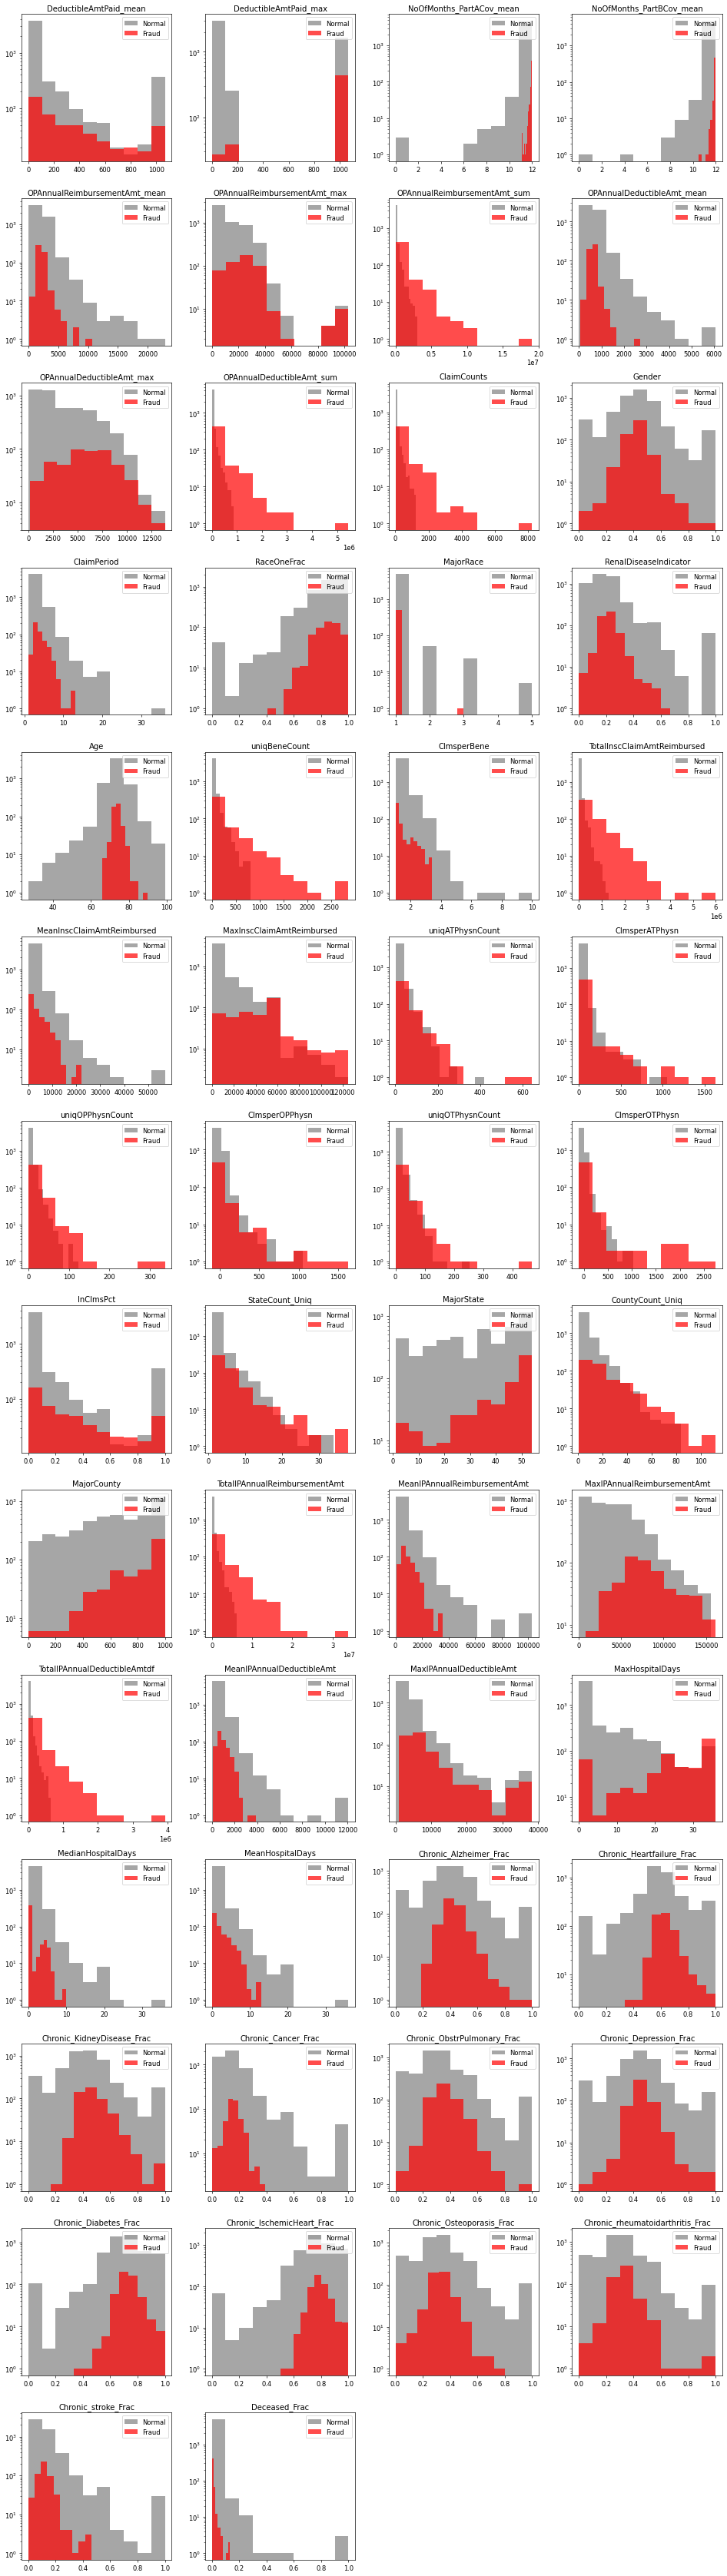

In [4]:
# log y hist

fig = plt.figure(figsize=(16,56),dpi=60)

for i in range(2,len(provider_merged_agg.columns)):
    plt.subplot(14,4,i-1)
    plt.hist(provider_merged_agg.loc[provider_merged_agg['PotentialFraud']=='No'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='gray',label='Normal')
    plt.hist(provider_merged_agg.loc[provider_merged_agg['PotentialFraud']=='Yes'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='red',label='Fraud')
    plt.title(provider_merged_agg.columns[i])
    plt.yscale('log')
    plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

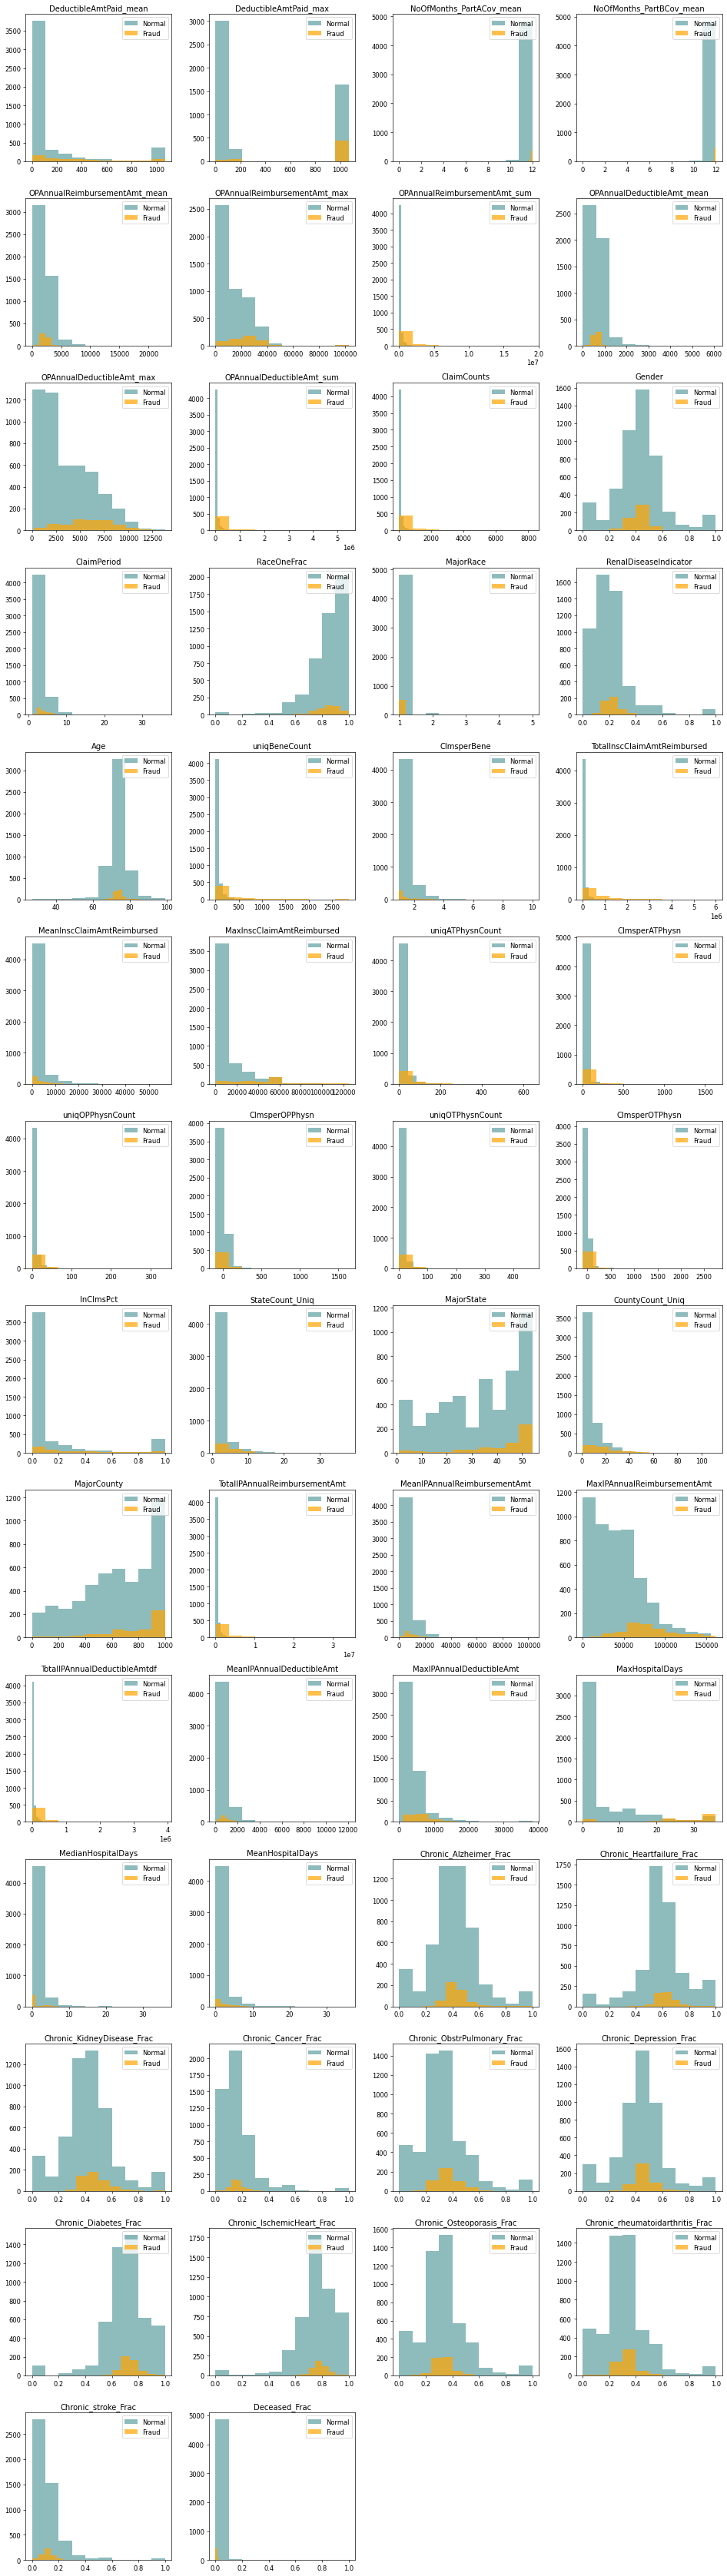

In [5]:
fig = plt.figure(figsize=(16,56),dpi=60)

for i in range(2,len(provider_merged_agg.columns)):
    plt.subplot(14,4,i-1)
    plt.hist(provider_merged_agg.loc[provider_merged_agg['PotentialFraud']=='No'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='cadetblue',label='Normal')
    plt.hist(provider_merged_agg.loc[provider_merged_agg['PotentialFraud']=='Yes'].iloc[:,i:i+1].dropna().values,
             alpha=0.7,color='orange',label='Fraud')
    plt.title(provider_merged_agg.columns[i])
    plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

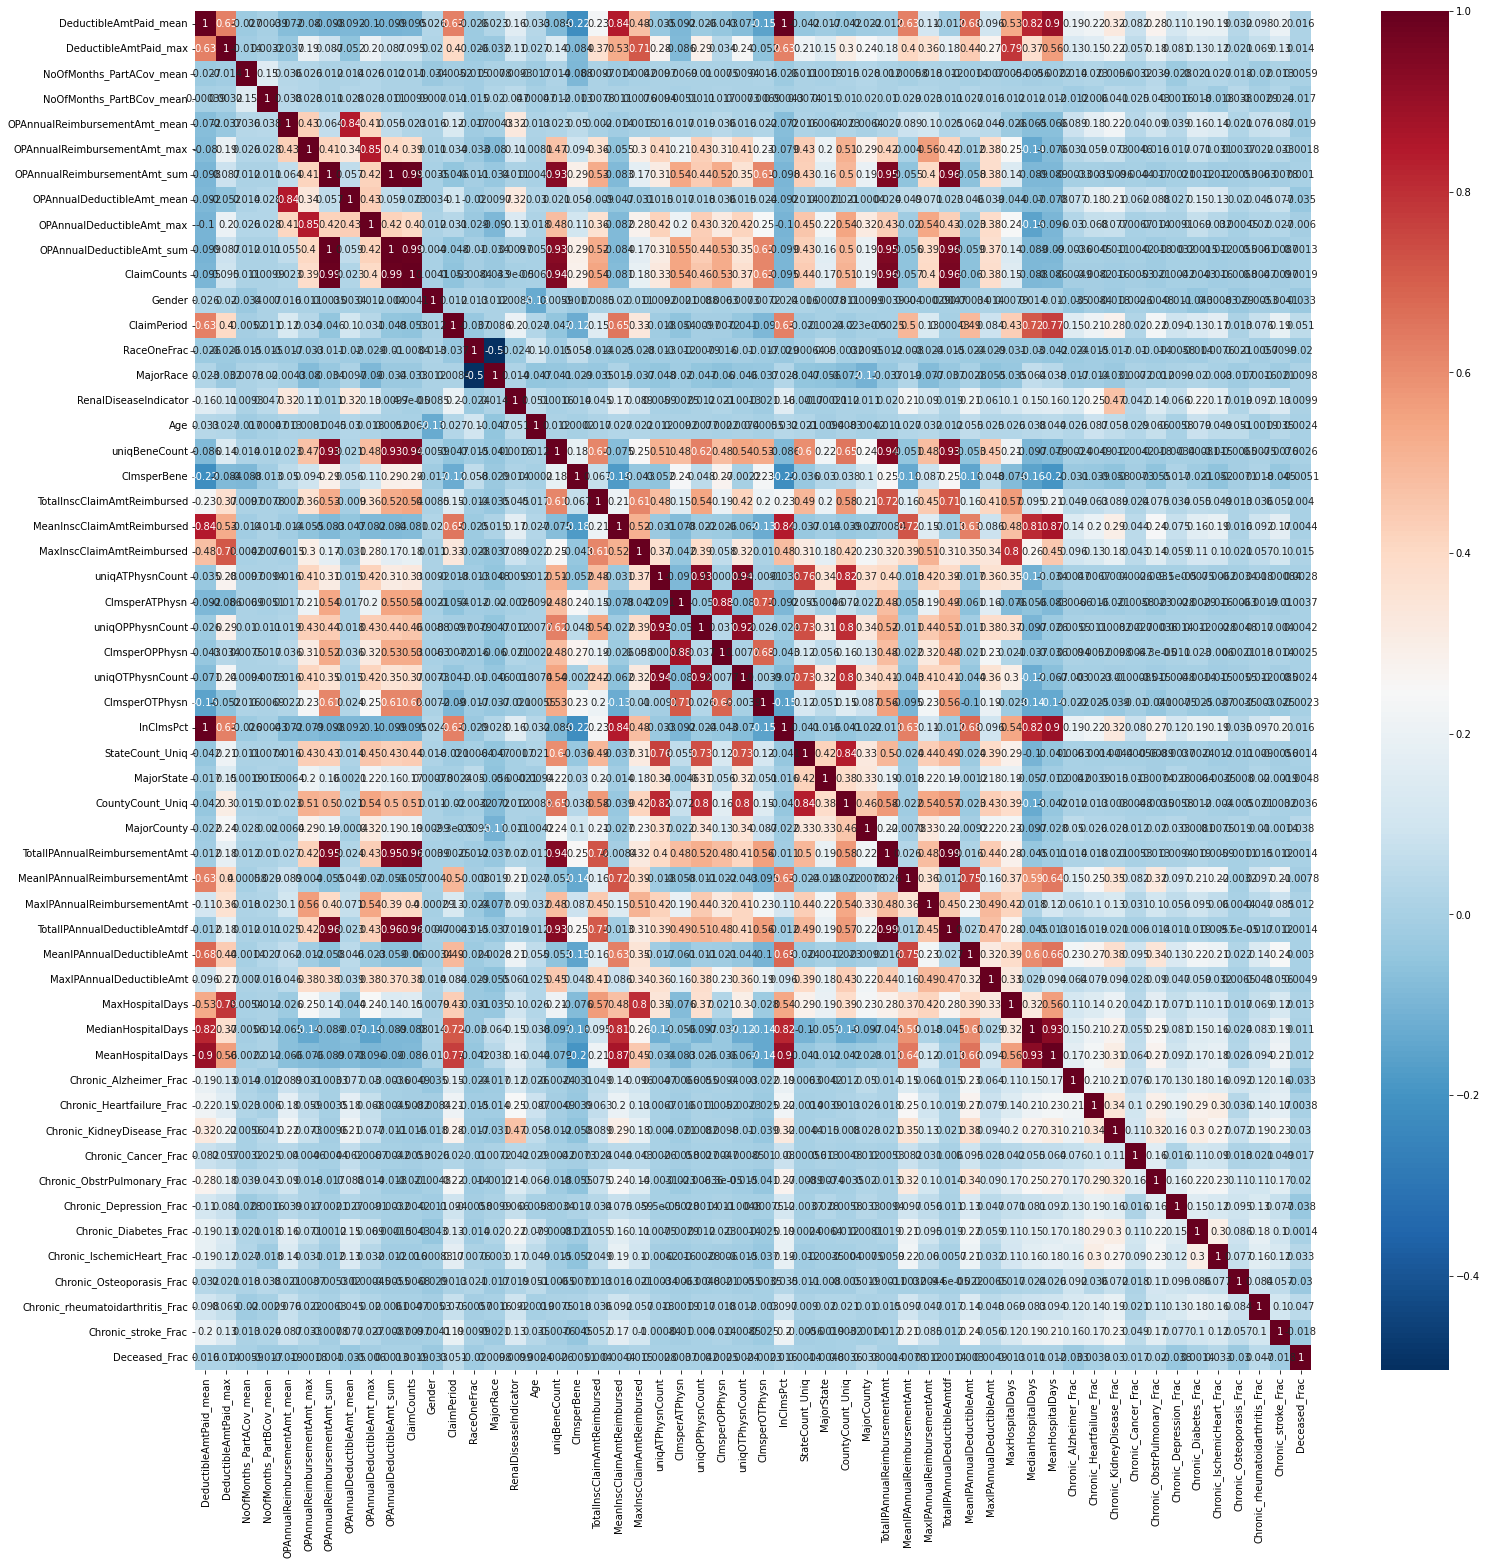

In [9]:
import seaborn as sb

pearsoncorr_num = provider_merged_agg.corr(method='pearson')
fig = plt.figure(figsize=(25,25))
sb.heatmap(pearsoncorr_num, 
            xticklabels=pearsoncorr_num.columns,
            yticklabels=pearsoncorr_num.columns,
            cmap='RdBu_r',
            annot=True)

plt.show()